<a href="https://colab.research.google.com/github/Jody565/Project2/blob/main/Jody_Jacobs_Project2Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
fname ="/content/drive/MyDrive/adult.csv"
df_income=pd.read_csv(fname)


##Load and inspect the data

In [8]:
df_income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [9]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
df_income.shape
print(f'There are {df_income.shape[0]} rows, and {df_income.shape[1]} columns.')

There are 48842 rows, and 15 columns.


##Clean the Data

###Check for Duplicates

In [11]:
df_income.duplicated().sum()

52

There are 52 duplicates in the data set

In [12]:
df_income.drop_duplicates(inplace=True)

In [13]:
df_income.duplicated().sum()

0

The duplicates have been dropped

###Checking Missing Values

In [14]:
df_income.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

There is no Missing Values in the dataset

##Check for Data Inconsistancies

In [15]:
str_cols=df_income.select_dtypes('object').columns
str_cols
# loop through the list of string columns
for col in str_cols:
# print the value counts for the column
 print(df_income[col].value_counts())
# Print an empty line for readability
 print('\n')

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64


Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64


Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical      

The only consistancies found are the question marks in certain features we will address this by making them blank and treating them as missing data

In [16]:
df_income.replace('?',np.nan,inplace = True)

In [17]:
df_income.isna().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [18]:
df_income.dropna(inplace=True)

In [19]:
df_income.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

All Missing values have been removed

In [20]:
df_income.describe(include='number').round(2)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45175.00,45175.00,45175.00,45175.00,45175.00,45175.00
mean,38.56,189738.80,10.12,1102.58,88.69,40.94
std,13.22,105652.44,2.55,7510.25,405.16,12.01
min,17.00,13492.00,1.00,0.00,0.00,1.00
25%,28.00,117392.50,9.00,0.00,0.00,40.00
50%,37.00,178312.00,10.00,0.00,0.00,40.00
75%,47.00,237903.00,13.00,0.00,0.00,45.00
max,90.00,1490400.00,16.00,99999.00,4356.00,99.00


In [21]:
df_income['capital-gain'].value_counts()

0        41385
15024      498
7688       391
7298       351
99999      229
         ...  
22040        1
1731         1
7262         1
1639         1
2387         1
Name: capital-gain, Length: 121, dtype: int64

In [22]:
df_income['capital-loss'].value_counts()

0       43035
1902      294
1977      246
1887      228
2415       68
        ...  
419         1
155         1
1539        1
2201        1
1421        1
Name: capital-loss, Length: 97, dtype: int64

The Capital gain and Capital loss columns seems to have mostly zero values,therefore i will drop these columns

In [23]:
df_income.drop(['capital-gain','capital-loss'],axis=1,inplace=True)

In [24]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45175 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45175 non-null  int64 
 1   workclass        45175 non-null  object
 2   fnlwgt           45175 non-null  int64 
 3   education        45175 non-null  object
 4   educational-num  45175 non-null  int64 
 5   marital-status   45175 non-null  object
 6   occupation       45175 non-null  object
 7   relationship     45175 non-null  object
 8   race             45175 non-null  object
 9   gender           45175 non-null  object
 10  hours-per-week   45175 non-null  int64 
 11  native-country   45175 non-null  object
 12  income           45175 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.8+ MB


Columns have been removed

## Explore the data

In [25]:

def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  temp_df = df_income.copy()
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100

  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  fig, ax = plt.subplots(figsize=figsize)

  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_title(f"Column: {x}", fontweight='bold')
  fig.tight_layout()
  plt.show()

  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  val_counts = temp_df[x].value_counts(dropna=False)
  most_common_val = val_counts.index[0]
  freq = val_counts.values[0]
  perc_most_common = freq / len(temp_df) * 100
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax



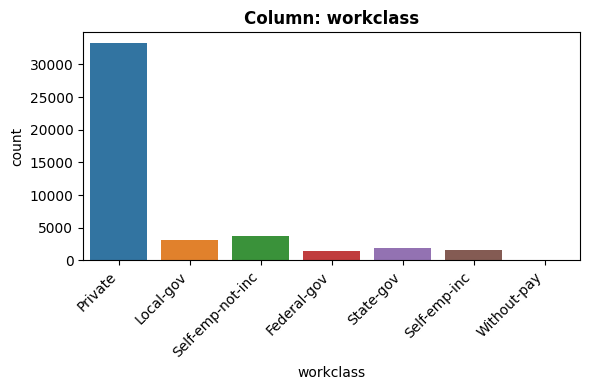

- NaN's Found: 0 (0.0%)
- Unique Values: 7
- Most common value: 'Private' occurs 33262 times (73.63%)
- Not constant or quasi-constant.


In [26]:
explore_categorical(df_income, 'workclass');

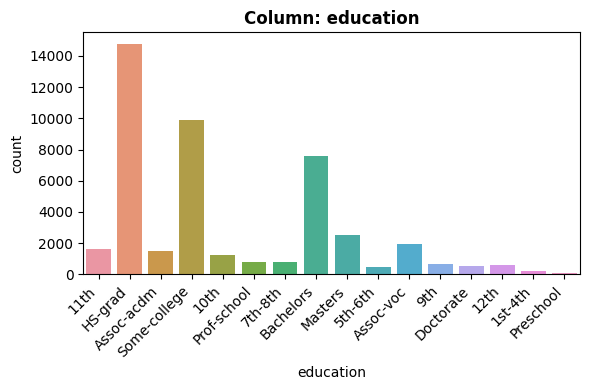

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'HS-grad' occurs 14770 times (32.7%)
- Not constant or quasi-constant.


In [27]:
explore_categorical(df_income, 'education');

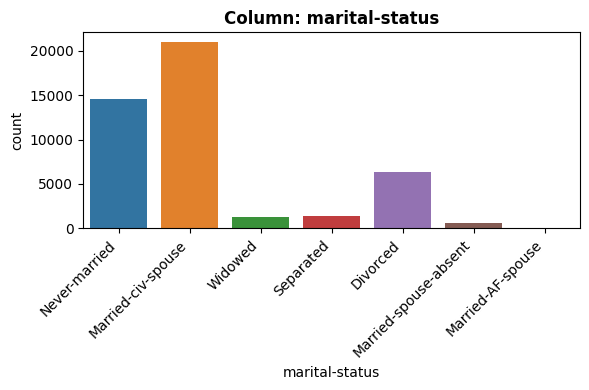

- NaN's Found: 0 (0.0%)
- Unique Values: 7
- Most common value: 'Married-civ-spouse' occurs 21042 times (46.58%)
- Not constant or quasi-constant.


In [28]:
explore_categorical(df_income, 'marital-status');

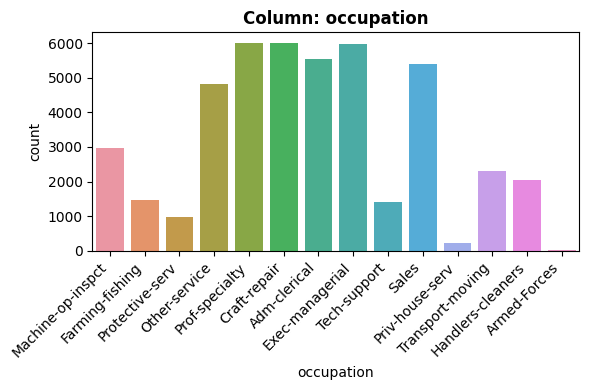

- NaN's Found: 0 (0.0%)
- Unique Values: 14
- Most common value: 'Craft-repair' occurs 6010 times (13.3%)
- Not constant or quasi-constant.


In [29]:
explore_categorical(df_income, 'occupation');

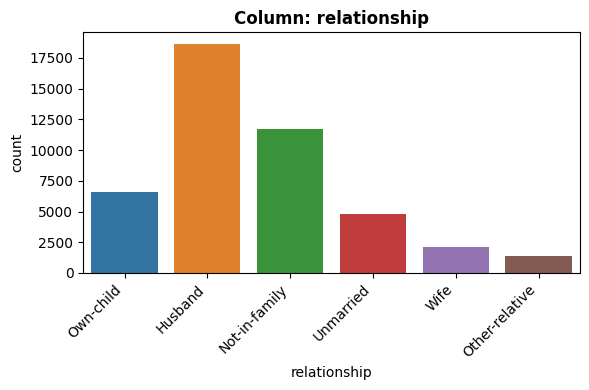

- NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: 'Husband' occurs 18653 times (41.29%)
- Not constant or quasi-constant.


In [30]:
explore_categorical(df_income, 'relationship');

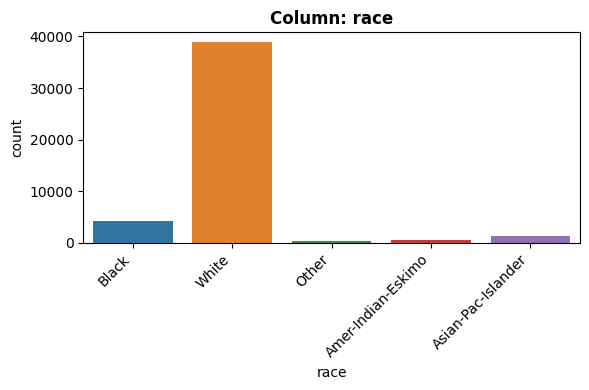

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'White' occurs 38859 times (86.02%)
- Not constant or quasi-constant.


In [31]:
explore_categorical(df_income, 'race');

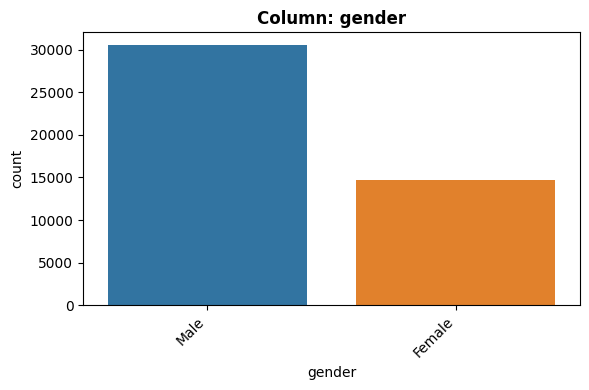

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Male' occurs 30495 times (67.5%)
- Not constant or quasi-constant.


In [32]:
explore_categorical(df_income, 'gender');

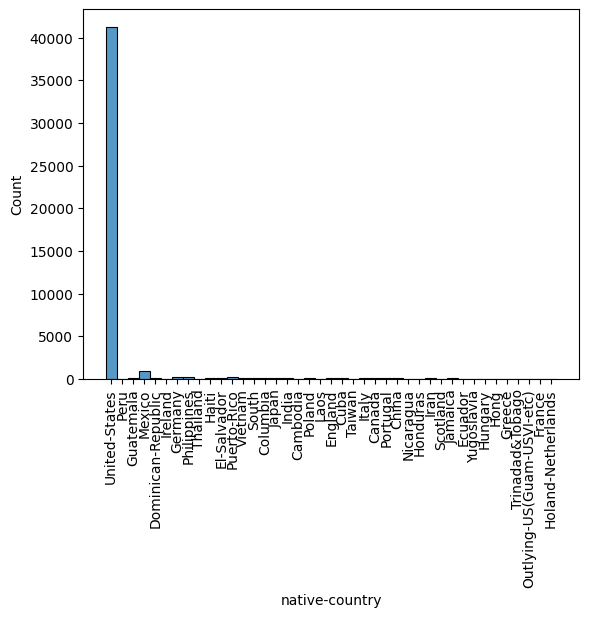

In [33]:
ax = sns.histplot(data=df_income, x='native-country',binwidth =1000,)
ax.tick_params(axis='x', rotation = 90);

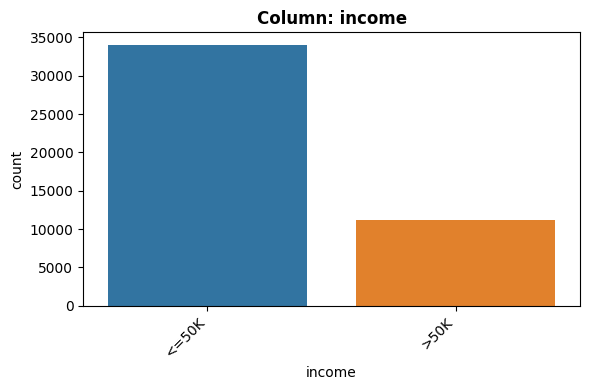

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '<=50K' occurs 33973 times (75.2%)
- Not constant or quasi-constant.


In [34]:
explore_categorical(df_income, 'income');

###Correlation bewteen Data


In [36]:
corr = df_income.corr(numeric_only = True)
corr.round(2)


,age,fnlwgt,educational-num,hours-per-week
age,1.00,-0.08,0.04,0.10
fnlwgt,-0.08,1.00,-0.04,-0.02
educational-num,0.04,-0.04,1.00,0.15
hours-per-week,0.10,-0.02,0.15,1.00


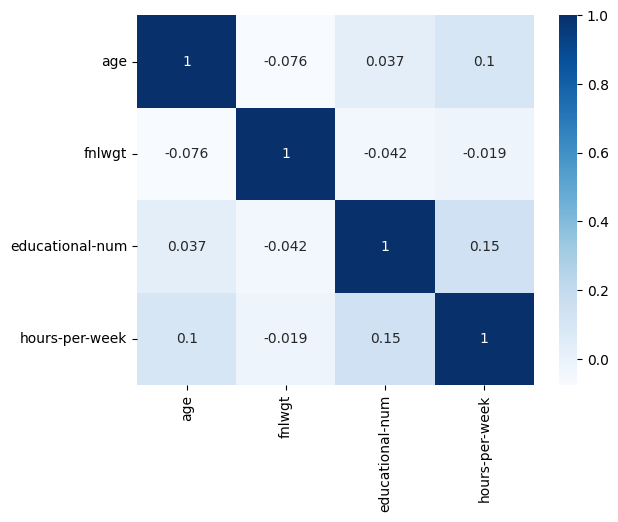

In [37]:
sns.heatmap(corr, cmap = 'Blues', annot = True);

###Create Multivariate Visualizations

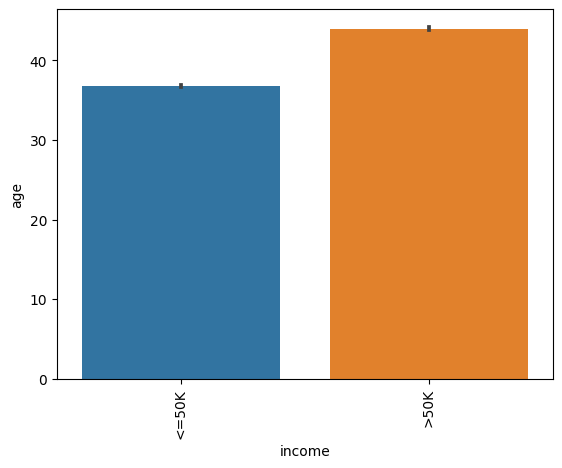

In [38]:
ax = sns.barplot(data=df_income, x='income', y="age")
ax.tick_params(axis='x', rotation = 90);

From the Barplot above we can see that the most people earning over 50K are over 40yrs old

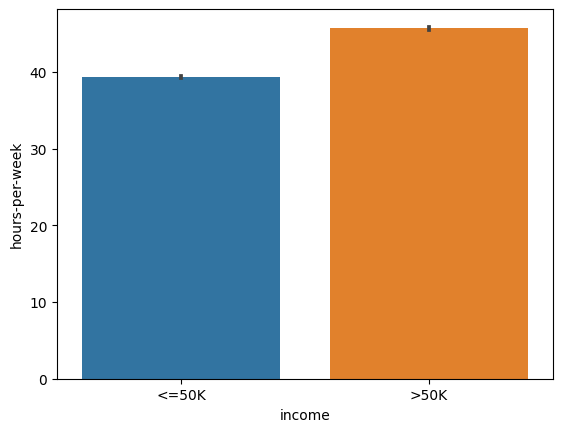

In [39]:
ax = sns.barplot(data=df_income, x='income', y='hours-per-week')

We can see that most adults earning >50k work more than 40hours per week


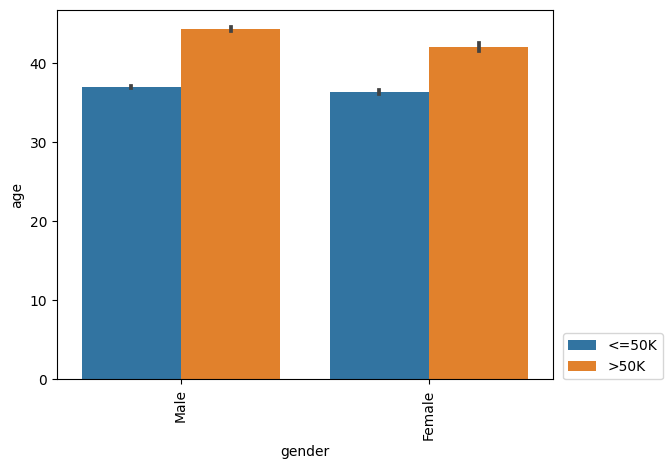

In [40]:
ax = sns.barplot(data=df_income, x="gender", y="age", hue='income')
ax.tick_params(axis='x', rotation = 90)
ax.legend(loc=(1.02,0));

From the above graph we can see that most males and females earn >50k in their late 30's

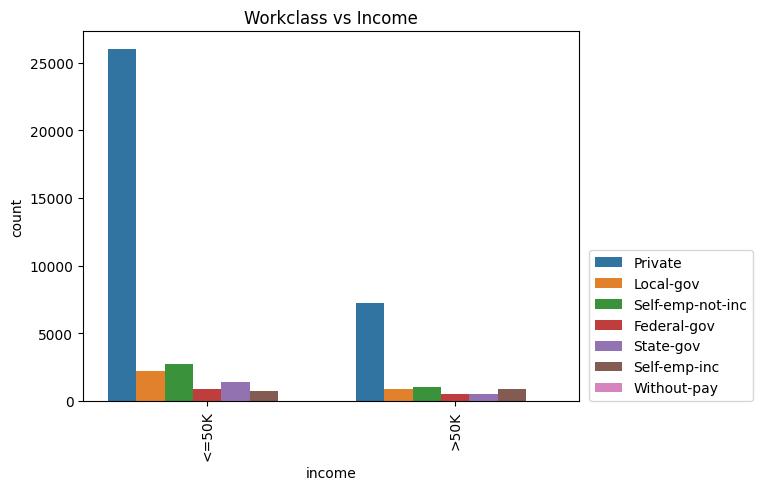

In [41]:
ax = sns.countplot(data=df_income, x='income', hue='workclass')
ax.tick_params(axis='x', rotation = 90);
ax.set_title('Workclass vs Income')
ax.legend(loc=(1.02,0));

The graph shows that most adults in this dataset works in the private sector and they also account for the most adults earning less than 50k and more than 50k

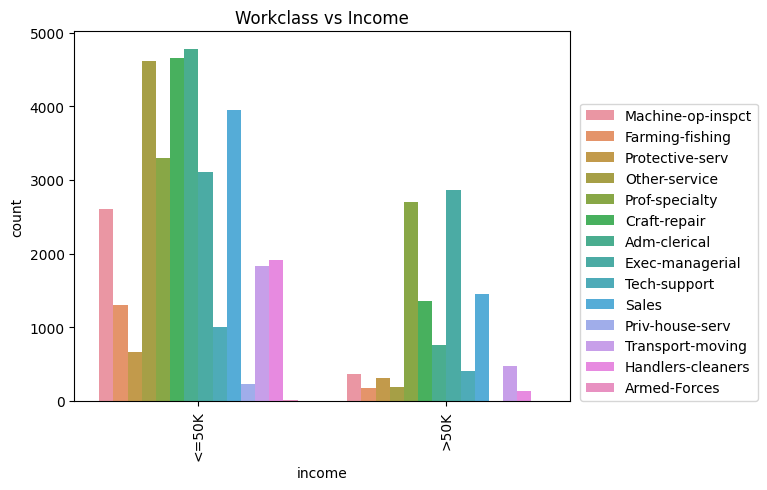

In [48]:
ax = sns.countplot(data=df_income, x='income', hue='occupation')
ax.tick_params(axis='x', rotation = 90);
ax.set_title('Workclass vs Income')
ax.legend(loc=(1.02,0));

From the graph we can see that the working class with the most adults earning less than 50k resides in the adm clerical role. The working class with the most adults earning over 50k is Exec-managerial

###Key Trends

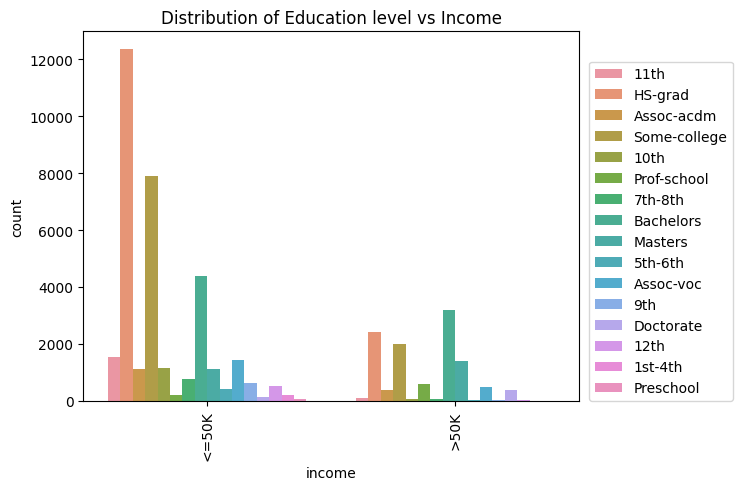

In [42]:
ax = sns.countplot(data=df_income, x='income', hue='education')
ax.tick_params(axis='x', rotation = 90);
ax.set_title('Distribution of Education level vs Income')
ax.legend(loc=(1.02,0));

From the graph we can see that most adults earning less than 50k are highschool graduates or have some college education. Fore the adults earning greater than 50k the most adults have a bacholors degree.

Text(0.5, 1.0, 'Distribution of Income vs Gender')

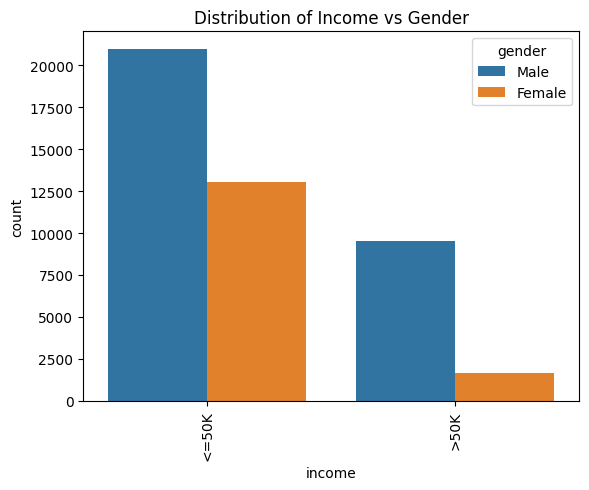

In [43]:
ax = sns.countplot(data=df_income, x='income', hue='gender')
ax.tick_params(axis='x', rotation = 90);
ax.set_title('Distribution of Income vs Gender')


From the graph above we can see that there are very little females earning greater than 50k with Males accounting for most of the adults earning above 50K